# Task-3

In [1]:
pip install networkx pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [16]:
!pip install euclidean scipy 

  Using cached euclidean-1.0.0b5.tar.gz (13 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for euclidean: filename=euclidean-1.0.0b5-py3-none-any.whl size=18110 sha256=cce8288b69686693f9ba168cc266820c1dbb153571f8a4fd5d8b41d41ab15fde
  Stored in directory: c:\users\perpendicooler\appdata\local\pip\cache\wheels\f5\b6\7f\58a7978855d622d073977cbc71fe482c5b1752c119c7c88ebc
Successfully built euclidean


We will take the distance matrix as an example.
Then we will solve the TSP using the Christofides algorithm.
Then comparing this with ILP algorithm.
We have box plot to compare the results.

Approximate tour length (Christofides): 3002.1536883561193
Approximate tour (Christofides): ['Aleksandrów Łódzki', 'Daszyna', 'Dąbie', 'Swojczyce', 'Rejon ulicy Saperów', 'Człopa', 'Biały Bór', 'Czarna Woda', 'Cewice', 'Dobre Miasto', 'Srokowo', 'Węgorzewo', 'Raczki', 'Krasnopol', 'Krynki', 'Łapy', 'Korczew', 'Paprotnia', 'Cegłów', 'Wyśmierzyce', 'Grójec', 'Dziekanów Leśny', 'Jakubów', 'Krzywda', 'Firlej', 'Jastków', 'Sawin', 'Hrubieszów', 'Ostrów', 'Pruchnik', 'Chmielnik', 'Niedźwiada', 'Jodłówka-Wałki', 'Czarków', 'Wiśniowa', 'Szarów', 'Maszkienice', 'Siedliska', 'Żurowa', 'Borowa', 'Opatów', 'Dwikozy', 'Godziszów', 'Wólka Tanewska', 'Józefów nad Wisłą', 'Karczmiska', 'Ciepielów', 'Iłża', 'Radoszyce', 'Rzgów', 'Aleksandrów Łódzki']


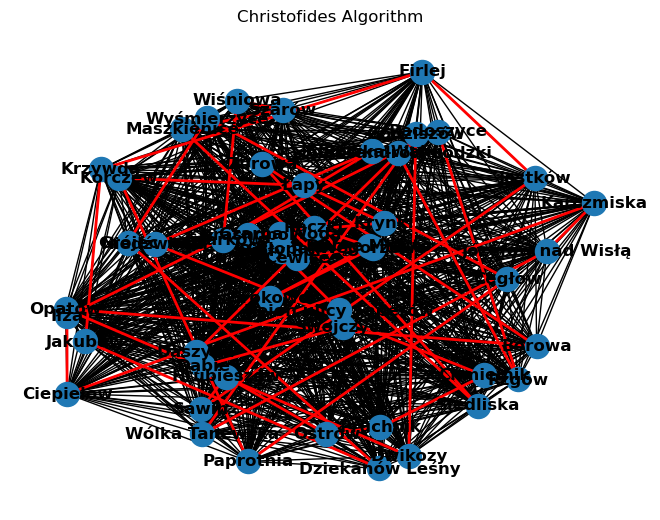


ILP Status: Optimal
ILP Optimal Path:
Aleksandrów Łódzki Rzgów
Biały Bór Człopa
Borowa Niedźwiada
Cegłów Jakubów
Cewice Czarna Woda
Chmielnik Pruchnik
Ciepielów Iłża
Czarków Wiśniowa
Czarna Woda Cewice
Człopa Biały Bór
Daszyna Dąbie
Dobre Miasto Węgorzewo
Dwikozy Opatów
Dziekanów Leśny Grójec
Dąbie Daszyna
Firlej Krzywda
Godziszów Wólka Tanewska
Grójec Dziekanów Leśny
Hrubieszów Sawin
Iłża Ciepielów
Jakubów Cegłów
Jastków Firlej
Jodłówka-Wałki Borowa
Józefów nad Wisłą Karczmiska
Karczmiska Józefów nad Wisłą
Korczew Paprotnia
Krasnopol Raczki
Krynki Łapy
Krzywda Jastków
Maszkienice Szarów
Niedźwiada Jodłówka-Wałki
Opatów Dwikozy
Ostrów Chmielnik
Paprotnia Korczew
Pruchnik Ostrów
Raczki Krasnopol
Radoszyce Wyśmierzyce
Rejon ulicy Saperów Swojczyce
Rzgów Aleksandrów Łódzki
Sawin Hrubieszów
Siedliska Żurowa
Srokowo Dobre Miasto
Swojczyce Rejon ulicy Saperów
Szarów Maszkienice
Wiśniowa Czarków
Wyśmierzyce Radoszyce
Wólka Tanewska Godziszów
Węgorzewo Srokowo
Łapy Krynki
Żurowa Siedliska
Exe

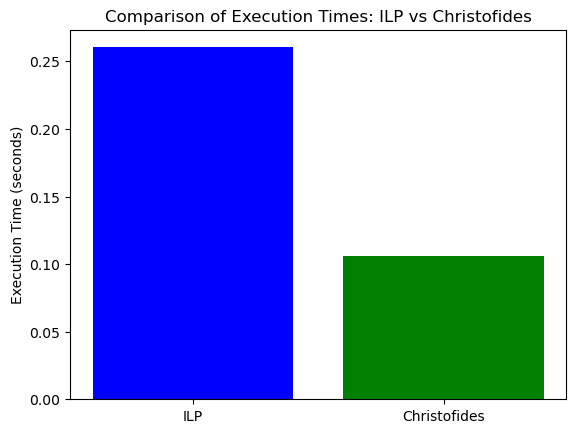

In [35]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations
from scipy.spatial.distance import euclidean
from scipy.optimize import linear_sum_assignment
import time
from pulp import LpProblem, LpVariable, lpSum, LpMinimize, LpStatus

# Step 1: Read the data from Excel
file_path = r"C:\Users\Perpendicooler\distance_matrix.xlsx"
df = pd.read_excel(file_path, index_col=0)

# Step 2: Create a graph from the distance matrix for Christofides algorithm
G_christofides = nx.Graph()
cities = df.index
G_christofides.add_nodes_from(cities)

for i, j in permutations(cities, 2):
    G_christofides.add_edge(i, j, weight=df.at[i, j])

# Step 3: Solve TSP using the Christofides algorithm
start_time_christofides = time.time()

# Approximation algorithm
approximate_tour_christofides = nx.approximation.traveling_salesman_problem(G_christofides, weight="weight", cycle=True)

# Compute the total distance of the approximate tour
approximate_tour_length_christofides = sum(G_christofides[i][j]["weight"] for i, j in zip(approximate_tour_christofides, approximate_tour_christofides[1:]))

end_time_christofides = time.time()

# Step 4: Print the results for Christofides algorithm
print("Approximate tour length (Christofides):", approximate_tour_length_christofides)
print("Approximate tour (Christofides):", approximate_tour_christofides)


# Step 5: Plot the graph with the approximate tour for Christofides algorithm
pos_christofides = nx.spring_layout(G_christofides)
nx.draw(G_christofides, pos_christofides, with_labels=True, font_weight="bold")
edges_christofides = list(zip(approximate_tour_christofides, approximate_tour_christofides[1:]))
nx.draw_networkx_edges(G_christofides, pos_christofides, edgelist=edges_christofides, edge_color="r", width=2)
plt.title('Christofides Algorithm')
plt.savefig('christofides_plot.png')
plt.show()

# Step 6: Repeat the process for ILP
# Load data from Excel, setting 'Unnamed: 0' as the index
data_ilp = pd.read_excel(file_path, index_col='Unnamed: 0')

# Extract city names
city_names_ilp = list(data_ilp.columns)
city_indices_ilp = {city: i for i, city in enumerate(city_names_ilp)}

# Extract distances
distances_ilp = {(city_indices_ilp[i], city_indices_ilp[j]): data_ilp.at[i, j] for i in city_names_ilp for j in city_names_ilp if i != j}

# Create optimization model for ILP
model_ilp = LpProblem("TSP", LpMinimize)

# Decision variables for ILP
x_ilp = {(i, j): LpVariable(name=f"x_{i}_{j}", cat='Binary') for i in city_indices_ilp.values() for j in city_indices_ilp.values() if i != j}

# Objective function for ILP
model_ilp += lpSum(distances_ilp[i, j] * x_ilp[i, j] for i in city_indices_ilp.values() for j in city_indices_ilp.values() if i != j), "Minimize Distance"

# Constraints for ILP
# Ensure that each city is visited exactly once
for i in city_indices_ilp.values():
    model_ilp += lpSum(x_ilp[i, j] for j in city_indices_ilp.values() if i != j) == 1, f"VisitOnce_{i}"

# Ensure that each city is left exactly once
for j in city_indices_ilp.values():
    model_ilp += lpSum(x_ilp[i, j] for i in city_indices_ilp.values() if i != j) == 1, f"LeaveOnce_{j}"

# Solve the model and measure execution time for ILP
start_time_ilp = time.time()
model_ilp.solve()
end_time_ilp = time.time()

# Display the results for ILP
print("\nILP Status:", LpStatus[model_ilp.status])

# Print the optimal path for ILP
optimal_path_ilp = [var for var in model_ilp.variables() if var.value() == 1]
print("ILP Optimal Path:")
for var in sorted(optimal_path_ilp, key=lambda v: (int(v.name.split('_')[1]), int(v.name.split('_')[2]))):
    print(city_names_ilp[int(var.name.split('_')[1])], city_names_ilp[int(var.name.split('_')[2])])

# Display the Exceution time for ILP   
print("Execution Time for ILP:", end_time_ilp - start_time_ilp)

# Display the execution time for Christofides algorithm
print("Execution Time for Christofides:", end_time_christofides - start_time_christofides)

# Compare execution times in a plot
labels = ['ILP', 'Christofides']
execution_times = [end_time_ilp - start_time_ilp, end_time_christofides - start_time_christofides]

plt.bar(labels, execution_times, color=['blue', 'green'])
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Times: ILP vs Christofides')
plt.savefig('execution_time_comparison.png')
plt.show()


For reference, the code can be found here in Task-2.1

In [31]:
import pandas as pd
from pulp import LpProblem, LpVariable, lpSum, LpMinimize, LpStatus
import time

# Load data from Excel, setting 'Unnamed: 0' as the index
data = pd.read_excel(r"C:\Users\Perpendicooler\distance_matrix.xlsx", index_col='Unnamed: 0')

# Extract city names
city_names = list(data.columns)
city_indices = {city: i for i, city in enumerate(city_names)}

# Extract distances
distances = {(city_indices[i], city_indices[j]): data.at[i, j] for i in city_names for j in city_names if i != j}

# Create optimization model
model_tsp = LpProblem("TSP", LpMinimize)

# Decision variables
x = {(i, j): LpVariable(name=f"x_{i}_{j}", cat='Binary') for i in city_indices.values() for j in city_indices.values() if i != j}

# Objective function
model_tsp += lpSum(distances[i, j] * x[i, j] for i in city_indices.values() for j in city_indices.values() if i != j), "Minimize Distance"

# Constraints
# Ensure that each city is visited exactly once
for i in city_indices.values():
    model_tsp += lpSum(x[i, j] for j in city_indices.values() if i != j) == 1, f"VisitOnce_{i}"

# Ensure that each city is left exactly once
for j in city_indices.values():
    model_tsp += lpSum(x[i, j] for i in city_indices.values() if i != j) == 1, f"LeaveOnce_{j}"

# Solve the model and measure execution time
start_time = time.time()
model_tsp.solve()
end_time = time.time()

# Display the results
print("Status:", LpStatus[model_tsp.status])

# Print the optimal path
optimal_path = [var for var in model_tsp.variables() if var.value() == 1]
print("Optimal Path:")
for var in sorted(optimal_path, key=lambda v: (int(v.name.split('_')[1]), int(v.name.split('_')[2]))):
    print(f"{var.name}: {var.value()}")

# Display the optimal path
optimal_path_indices = [int(var.name.split('_')[1]) for var in optimal_path]
optimal_path_indices.append(optimal_path_indices[0])  # Add the starting city at the end to complete the loop

optimal_path_names = [next(city for city, idx in city_indices.items() if idx == index) for index in optimal_path_indices]

print("Optimal Path:")
print(" -> ".join(optimal_path_names))

# Display the execution time
print("Execution Time for ILP:", end_time - start_time)


Status: Optimal
Optimal Path:
x_0_38: 1.0
x_1_9: 1.0
x_2_30: 1.0
x_3_20: 1.0
x_4_8: 1.0
x_5_34: 1.0
x_6_19: 1.0
x_7_44: 1.0
x_8_4: 1.0
x_9_1: 1.0
x_10_14: 1.0
x_11_47: 1.0
x_12_31: 1.0
x_13_17: 1.0
x_14_10: 1.0
x_15_28: 1.0
x_16_46: 1.0
x_17_13: 1.0
x_18_39: 1.0
x_19_6: 1.0
x_20_3: 1.0
x_21_15: 1.0
x_22_2: 1.0
x_23_24: 1.0
x_24_23: 1.0
x_25_33: 1.0
x_26_35: 1.0
x_27_48: 1.0
x_28_21: 1.0
x_29_43: 1.0
x_30_22: 1.0
x_31_12: 1.0
x_32_5: 1.0
x_33_25: 1.0
x_34_32: 1.0
x_35_26: 1.0
x_36_45: 1.0
x_37_42: 1.0
x_38_0: 1.0
x_39_18: 1.0
x_40_49: 1.0
x_41_11: 1.0
x_42_37: 1.0
x_43_29: 1.0
x_44_7: 1.0
x_45_36: 1.0
x_46_16: 1.0
x_47_41: 1.0
x_48_27: 1.0
x_49_40: 1.0
Optimal Path:
Aleksandrów Łódzki -> Daszyna -> Dobre Miasto -> Dwikozy -> Dziekanów Leśny -> Dąbie -> Firlej -> Godziszów -> Grójec -> Hrubieszów -> Iłża -> Biały Bór -> Jakubów -> Jastków -> Jodłówka-Wałki -> Józefów nad Wisłą -> Karczmiska -> Korczew -> Krasnopol -> Krynki -> Krzywda -> Maszkienice -> Borowa -> Niedźwiada -> Opatów -> O